### Simple implementation based on numerical arrays

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#### 1. Creation of train data

    1.1 Defining the number of samples m
    1.2 Creation of the x and y values
    1.3 Introduction of a normal distributed "error"

In [13]:
m = 30 # number of training samples

#The linspace function creates m numbers in the given interval (0,10)
x_values = np.linspace(0,10, num=m, endpoint=True)
y_values = np.linspace(0,10, num=m, endpoint=True)
x_values[:10]

array([0.        , 0.34482759, 0.68965517, 1.03448276, 1.37931034,
       1.72413793, 2.06896552, 2.4137931 , 2.75862069, 3.10344828])

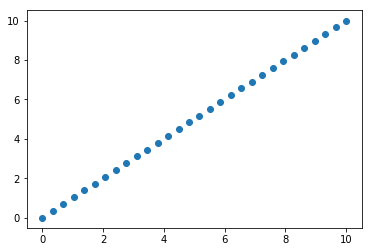

In [14]:
plt.scatter(x_values, y_values)
plt.show()

In [15]:
# Error
mu = 0.0
sigma = 1.5
error = np.random.uniform(mu, sigma, m)
y_values = y_values+error

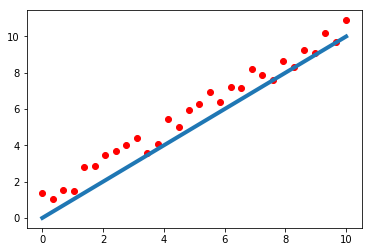

In [43]:
plt.scatter(x_values, y_values, color='red')
plt.plot(x_values, y_values-error, linewidth=4)
plt.show()

### 2. Implementation of the hypothesis function as a function of x

In order to satisfy our main prediction goal, a hypothesis is needed. The hypothesis is the function, which allows to better describe our data. In this case, as it is a linear regression, our hypothesis has the form: y = mx + c or y = theta_1*x + theta_0.
The coefficients theta_1 and theta_0 are so called "weights" or "parameters": theta_1 is the slope, theta_0 is the "bias".

Hypothesis:

$h_\Theta (x) = \theta_0 + \theta_1 x$

In [17]:
def simple_hypothesis(theta_0, theta_1,x):
    return x*theta_1 + theta_0

In [18]:
#Use of a lambda expression to define the function
def linear_hypothesis(theta_0, theta_1):
    return lambda x: theta_1*x + theta_0

In [19]:
test_hypothesis = simple_hypothesis(1,0.5,x_values)
print(test_hypothesis)

[1.         1.17241379 1.34482759 1.51724138 1.68965517 1.86206897
 2.03448276 2.20689655 2.37931034 2.55172414 2.72413793 2.89655172
 3.06896552 3.24137931 3.4137931  3.5862069  3.75862069 3.93103448
 4.10344828 4.27586207 4.44827586 4.62068966 4.79310345 4.96551724
 5.13793103 5.31034483 5.48275862 5.65517241 5.82758621 6.        ]


In [20]:
test_lambda_hypothesis = linear_hypothesis(1,0.5)(x_values)
print(test_lambda_hypothesis)

[1.         1.17241379 1.34482759 1.51724138 1.68965517 1.86206897
 2.03448276 2.20689655 2.37931034 2.55172414 2.72413793 2.89655172
 3.06896552 3.24137931 3.4137931  3.5862069  3.75862069 3.93103448
 4.10344828 4.27586207 4.44827586 4.62068966 4.79310345 4.96551724
 5.13793103 5.31034483 5.48275862 5.65517241 5.82758621 6.        ]


### 3. Cost function (function of the parameters)

The above mentioned parameters should be "learned" during the training phase, e.g. they are adapted in every training "run". As a result we should check how wrong or how good the new hypothesis, resulting from the updated parameters, describe our data. The cost functions measures how good or how wrog our model on "its ability to estimate the relationship between X and y" (MacDonald) --> Measuring the distance between the hypothesis (= predicted value) and the original y values :-)

We want to <b>learn from data</b> in order to <b>minimize the costs</b>.

The cost function used is the Square error cost function:

$J_{\mathcal D}(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})^2$

In [21]:
def cost_function(hypothesis,x,y, t0=0, t1=0):
    assert len(x) == len(y) #condition
    m = float(len(x)) 
    #The cost function is a function of the parameters
    return lambda theta_0, theta_1: 1./(2*m)*((hypothesis(theta_0,theta_1)(x)-y)**2).sum()

j = cost_function(linear_hypothesis, x_values, y_values)
#print(j)
print(j(2.9,2.7))

70.02716754370397


### 3.1 Plotting the cost function as a contour plot

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [23]:
def plot_cost_function(x,y):
    a = 10
    b = 0
    ran = 30
    t0 = np.arange(a - ran, a + ran, ran * 0.05)
    t1 = np.arange(b - ran, b + ran, ran * 0.05)

    C = np.zeros([len(t0),len(t1)])
    c = cost_function(linear_hypothesis, x, y)
    
    #This part of the code was provided during the course
    for i, t_0 in enumerate(t0):
        for j, t_1 in enumerate(t1):
            C[j][i] = c(t_0, t_1)

    T0, T1 = np.meshgrid(t0, t1)

    plt.subplot(121)
    plt.contour(T0, T1, C)
    plt.xlabel('$\Theta_0$')
    plt.ylabel('$\Theta_1$')
    plt.title('Cost function')
    plt.show()

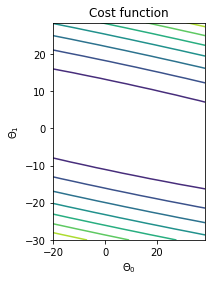

In [24]:
plot_cost_function(x_values, y_values)

### 4. Minimize the cost: Gradient descent

The gradient descent is used to find a gobal minumum of the given cost function. The model should take a "direction" in order to reduce errors.
The learning process is an iterative process: the goal is to let the model gradually converge towards the minimum (cfr. MacDonald). At this point the parameters should be the optimal ones.

#### How to solve the gradient

At each iteration we have some theta_0 and theta_1 values. We use these values to compute partial derivatives --> new gradient. At the current position we know the slope and the direction we should move in order to update again our parameters. How far we should move during the descent is set by the learning rate "alpha".

#### 4.1 Define an update function to calculate new theta values

New theta values are updated by applying the following rule:

$\theta_j^{neu} \leftarrow  \theta_j^{alt} - \alpha \frac{\partial}{\partial \theta_j} J(\Theta^{alt})$

In [30]:
def theta0_derivative(theta0,theta1, x, y):
    return (1./m *(linear_hypothesis(theta0,theta1)(x)-y).sum())

In [31]:
def theta1_derivative(theta0,theta1, x, y):
    return (1./m *((linear_hypothesis(theta0,theta1)(x)-y)*x).sum())

In [32]:
def update_theta(x,y,theta0, theta1, alpha):
    der_theta0 = theta0_derivative(theta0, theta1, x, y)
    der_theta1 = theta1_derivative(theta0, theta1, x,y)
    temp0 = theta0 - alpha*der_theta0
    temp1 = theta1 - alpha*der_theta1
    theta_0 = temp0
    theta_1 = temp1
    return theta_0, theta1

In [38]:
test_update = update_theta(x_values, y_values, 0, 1.3, 0.01)
test_update

(-0.006851033889892607, 1.3)

#### 4.2 Compute gradient descent

In [46]:
def gradient_descent(x, y, theta_0=0, theta_1=0, alpha=0.01, iterations = 1000):
    costs = [] # stores cost for each iteration
    #initial cost
    j = cost_function(linear_hypothesis, x, y)(theta_0,theta_1)
    costs.append(j)
    #Initial thetas
    theta0s = [theta_0]
    theta1s = [theta_1]
    
    for i in range(iterations):
        theta_0, theta_1 = update_theta(x,y,theta_0, theta_1, alpha)
        # Store thetas
        theta0s.append(theta_0)
        theta1s.append(theta_1)
        # Compute the new cost
        j = cost_function(linear_hypothesis, x, y)(theta_0,theta_1)
        costs.append(j)
    return {'theta0': theta_0, 'theta1': theta_1, "costs": costs}

In [47]:
iterations = 10000
theta0 = 0
theta1 = 1
gr1 = gradient_descent(x_values, y_values, theta_0 = theta0, theta_1 = theta1, iterations=iterations)

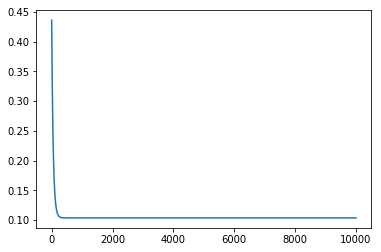

In [48]:
plt.plot(gr1['costs'])

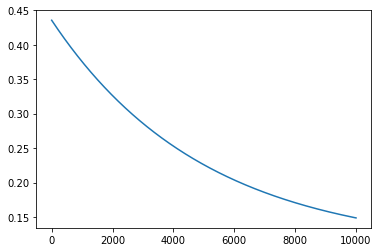

In [49]:
alpha = 0.0001 
gr2 = gradient_descent(x_values, y_values, theta_0 = theta0, theta_1 = theta1, iterations=iterations, alpha=alpha)
plt.plot(gr2['costs'])

In [57]:
alpha = 0.001 
gr3 = gradient_descent(x_values, y_values, theta_0 = theta0, theta_1 = theta1, iterations=iterations, alpha=alpha)
plt.plot(gr3['costs'])

### 5. Model plotting

In [59]:
#New line: y = mx +c
#1. Calculate m*x
model_x = gr3['theta1']*x_values
#2. Calculate new y
model_y = model_x + gr3['theta0']

plt.plot(model_x, model_y, color='red')
plt.scatter(x_values, y_values)
plt.show()


### Quellen:
- Course slides
- "Machine Learning", course by Andrew Ng
- MacDonald, "Machine learning fundamentals (I): Cost functions and gradient descent", URL:https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220